In [83]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from pandas.plotting import scatter_matrix

In [2]:
os.chdir(r'C:\Users\RAJAT SINGH\Downloads\australian cars')

In [3]:
df=pd.read_csv('cars.csv')

In [4]:
df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [5]:
len(df['Brand'].unique())

59

## EDA

In [6]:
#Finding is there any null values in our dataset

df.isnull().sum()

ID                  0
Name                0
Price               0
Brand               0
Model               0
Variant             0
Series              0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64

In [7]:
# Dropping certain columns which won't be helpful in prediction

df.drop(columns=['Name', 'Model','Variant', 'Series','ID','Seating Capacity'], inplace=True)

In [8]:
df.head()

,Price,Brand,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color
0,9999,Toyota,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey
1,117990,Mercedes-Benz,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black
2,79990,Mercedes-Benz,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black
3,34990,Mercedes-Benz,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black
4,15990,Holden,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White


In [9]:
df['Status']=df['Status'].str.replace(' ','')

In [10]:
df['Brand']=df['Brand'].str.replace('-', '')

In [11]:
# Converting many of the sub-categories into a single entity for easy understanding 

df['Type']=df['Type'].replace(['King Cab Utility','Freestyle Utility','Club Cab Utility','X Cab Utility','Club Cab Utility','Space Cab Utility','Super Cab Utility','Crew Cab Utility','Double Cab Utility','Dual Cab Utility'],'Utility')
df['Type']=df['Type'].replace(['Panel Van','Crew Cab Van','Blind Van','Crew Van'],'Van')
df['Type']=df['Type'].replace(['King Cab Pick Up','Super Cab Pickup','Club Cab Pickup','Space Cab Pickup','King Cab Pickup','X Cab Pickup','Crew Cab Pickup','Dual Cab Pick-up','Double Cab Pick Up'], 'Pickup')
df['Type']=df['Type'].replace(['Cab Chassis Tray','Coil Cab Chassis','Leaf Cab Chassis','Club Cab Chassis','Super Cab Chassis','Space Cab Chassis','Dual Cab Chassis','Crew Cab Chassis','Double Cab Chassis','X Cab Cab Chassis','Freestyle Cab Chassis'],'Cab Chassis')
df['Type']=df['Type'].replace(['Estate', 'Troop Carrier'], 'SUV')
df['Type']=df['Type'].replace(['Saloon','Softtop','Hardtop','Convertible','Cabriolet','Sportback','Roadster','Liftback','Fastback','Softback','Coupe'], 'Sedan')
df['Type']=df['Type'].replace(['Coach'],'Bus')
df['Type']=df['Type'].replace(['Sportswagon'],'Wagon')
df['Type']=df['Type'].replace(['Cab Chassis', 'Pickup'], 'SUV')

In [12]:
df['Fuel'].unique()

array(['Unleaded Petrol', 'Diesel', 'Premium Unleaded Petrol',
       'Premium Unleaded/Electric', 'Unleaded Petrol/Electric',
       'Liquid Petroleum Gas', 'Diesel/Electric'], dtype=object)

In [13]:
#Converting many of the sub-categories into a single entity using a different method for easy understanding.

def cat_fuel(inp):
    if inp=='Unleaded Petrol' or inp=='Premium Unleaded Petrol':
        return 'Petrol'
    elif inp=='Unleaded Petrol/Electric'or inp=='Premium Unleaded/Electric'or inp=='Diesel/Electric':
        return 'Hybrid'
    elif inp=='Diesel':
        return 'Diesel'
    elif inp=='Liquid Petroleum Gas':
        return 'Liquid Petroleum Gas'
    else:
        return 'other'

In [14]:
# Assigning a new column to our dataset with revised set of data's.

df['Fuels']=df['Fuel'].apply(cat_fuel)

In [15]:
df.head()

,Price,Brand,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Fuels
0,9999,Toyota,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,Petrol
1,117990,MercedesBenz,2021,19,Wagon,Automatic,Diesel,NewInStock,2143,Black,Diesel
2,79990,MercedesBenz,2021,24,Wagon,Automatic,Diesel,NewInStock,2143,Black,Diesel
3,34990,MercedesBenz,2010,120579,Sedan,Automatic,Diesel,Used,2143,Black,Diesel
4,15990,Holden,2016,72506,Wagon,Automatic,Unleaded Petrol,Used,1796,White,Petrol


In [16]:
df['Color'].unique()

array(['Grey', 'Black', 'White', 'Blue', 'Green', 'WHITE', 'Silver',
       'silver', 'Red', 'Gold', 'Fuji', 'Metallic', 'Gun', 'Light',
       'Cool', 'grey', 'BRITISH', 'Burgundy', 'Orange', 'Other', 'Pepper',
       'Titanium', 'white', 'Charcoal', 'Stromboli', 'Mercury', 'Brown',
       'Yellow', 'Leatherette', 'Graphite', 'Deep', 'Beige', 'Artic',
       'Frozen', 'Cream', 'neon', 'Pearl', 'Darkblue', 'maroon',
       'charcoal', 'Dark', 'Cirrus', 'blue', 'gray', 'green', 'Navy',
       'Learher', 'black', 'Glacier', 'Polar', 'Atomic', 'Whtie',
       'Patriot', 'Lighting', 'Sting', 'TRUE', 'SILVER', 'Alpine',
       'Navarra', 'Neptune', 'Tenorite', 'Bronze', 'Slipstream',
       'Horizon', 'Platinum', 'Toy', 'Cherry', 'BLUE', 'Liquid', 'Sliver',
       'While', 'Seduce', 'BLACK', 'Autumn', 'Meteor', 'Soul', 'Whte',
       'Crystal', 'vivid', 'Mountain', 'light', 'Selenite', 'Lava',
       'Harmony', 'GOLD', 'Vivid', 'Granite', 'Gecko', 'red', 'Ceramic',
       'Gray', 'Summit', 

In [17]:
# Creating a function to align all the same color by a single name
def cat_color(inp):
    if inp=='White'or inp=='WHITE'or inp=='Cool'or inp=='white'or inp=='Arctic'or inp=='Frozen'or inp=='Glacier'or inp=='Polar'or inp=='Whtie'or inp=='While'or inp=='Crystal'or inp=='Ceramic'or inp=='crystal'or inp=='Ice'or inp=='ICE'or inp=='Snowflake'or inp=='Waite'or inp=='Celestite'or inp=='Frosted'or inp=='CRYSTAL'or inp=='Pacific'or inp=='Glazier'or inp=='Mineral'or inp=='WR':
        return 'White'
    elif inp=='Space'or inp=='Onxy'or inp=='Onyx'or inp=='night'or inp=='Carbon'or inp=='metallic'or inp=='Matte'or inp=='Metallic'or inp=='Black'or inp=='Charcoal'or inp=='Dark'or inp=='charcoal'or inp=='black'or inp=='BLACK'or inp=='Satin'or inp=='Glossy'or int=='Space':
        return 'Black'
    elif inp=='Light'or inp=='Gold'or inp=='Yellow'or inp=='Leatherette'or inp=='Beige'or inp=='Creme'or inp=='Pearl'or inp=='Learher'or inp=='Lighting'or inp=='Bronze'or inp=='light'or inp=='GOLD'or inp=='pearl'or inp=='beige'or inp=='Bright'or inp=='Sunset'or inp=='gold'or inp=='Leather'or inp=='yellow'or inp=='Perl':
        return 'Yellow'
    elif inp=='Meteor'or inp=='Smoke'or inp=='Greg'or inp=='Mica'or inp=='Phantom'or inp=='GREY'or inp=='Grey'or inp=='Graphite'or inp=='Moondust'or inp=='Mountain'or inp=='Gray'or inp=='Gunmetal'or inp=='Smoke':
        return 'Grey'
    elif inp=='Silver'or int=='Steel'or inp=='Diamond'or inp=='Platinum'or inp=='Sliver'or inp=='SILVER'or inp=='Celestite'or inp=='Alumnium'or inp=='SIlver'or inp=='Silber':
        return 'Silver'
    elif inp=='RED'or inp=='Nitrate'or inp=='Rouge'or inp=='Rhodium'or inp=='Maroon'or inp=='Sapphire'or inp=='Red'or inp=='maroon'or inp=='Ruby'or inp=='Purple'or inp=='Fuji'or inp=='cherry'or inp=='Toy'or inp=='Lava'or inp=='red'or inp=='candy'or inp=='Candy':
        return 'Red'
    elif inp=='Blue'or inp=='Deep'or inp=='Sky'or inp=='Aurora'or inp=='Soul'or inp=='Liquid'or inp=='BLUE'or inp=='Horizon'or inp=='Darkblue'or inp=='blue'or inp=='Tidal'or inp=='Ocean'or inp=='Clear'or inp=='Surfy':
        return 'Blue'
    else:
        return 'others'

In [18]:
# Adding a new column .

df['Colour']=df['Color'].apply(cat_color)

In [19]:
df['Gearbox'].unique()

array(['Automatic', 'Manual', 'Front', 'AWD', 'Rear'], dtype=object)

In [20]:
def cat_gear(inp):
    if inp=='Automatic'or inp=='AWD':
        return 'Automatic'
    elif inp=='Manual'or inp=='Front'or inp=='Rear':
        return 'Manual'
    else:
        return 'Other'

In [21]:
df['Gear_box']=df['Gearbox'].apply(cat_gear)

In [22]:
# Dropping the extra columns

df.drop(columns=['Gearbox','Fuel','Color'], inplace=True)

In [23]:
df.head(2)

,Price,Brand,Year,Kilometers,Type,Status,CC,Fuels,Colour,Gear_box
0,9999,Toyota,2010,263000,Wagon,Used,2362,Petrol,Grey,Automatic
1,117990,MercedesBenz,2021,19,Wagon,NewInStock,2143,Diesel,Black,Automatic


In [24]:
df['Brand'].value_counts()

Toyota             2768
Holden             1505
Ford               1490
Mazda              1167
Hyundai            1087
Mitsubishi         1074
Volkswagen         1019
Nissan             1008
Kia                 744
Subaru              655
MercedesBenz        625
Audi                518
BMW                 480
Honda               413
Jeep                379
Land Rover          273
Isuzu               267
Lexus               180
Volvo               161
Skoda               160
Suzuki              160
Renault             158
LDV                 122
MG                   97
Porsche              91
Mini                 66
Peugeot              45
Chrysler             42
Jaguar               38
HSV                  37
GWM                  29
Great Wall           27
Ram                  23
Fiat                 17
Dodge                14
Citroen              13
Alfa Romeo           11
Ssangyong            11
Infiniti              9
Maserati              8
Chevrolet             7
Bentley         

In [25]:
# Finding out which companies are the least in our dataset and converting them into dict.

x=df['Brand'].value_counts()>10
max_cars=x[x].index

In [26]:
# Removing the companies with least count.

df=df[df['Brand'].isin(max_cars)]
df

,Price,Brand,Year,Kilometers,Type,Status,CC,Fuels,Colour,Gear_box
0,9999,Toyota,2010,263000,Wagon,Used,2362,Petrol,Grey,Automatic
1,117990,MercedesBenz,2021,19,Wagon,NewInStock,2143,Diesel,Black,Automatic
2,79990,MercedesBenz,2021,24,Wagon,NewInStock,2143,Diesel,Black,Automatic
3,34990,MercedesBenz,2010,120579,Sedan,Used,2143,Diesel,Black,Automatic
4,15990,Holden,2016,72506,Wagon,Used,1796,Petrol,White,Automatic
...,...,...,...,...,...,...,...,...,...,...
17043,4499,Holden,2003,230441,Sedan,Used,3791,Petrol,Yellow,Automatic
17044,4999,Toyota,2008,237113,Hatchback,Used,1299,Petrol,Yellow,Manual
17045,7999,Holden,2002,238768,Wagon,Used,2999,Diesel,Yellow,Automatic
17046,14000,Hyundai,2016,49800,Hatchback,Used,1797,Petrol,Blue,Manual


In [27]:
# Rearranging the columns

df=df[['Brand','Price','Year','Kilometers','Type','Status','Fuels','CC','Colour','Gear_box']]

In [28]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Brand
['Toyota' 'MercedesBenz' 'Holden' 'Nissan' 'Ford' 'BMW' 'Isuzu' 'Hyundai'
 'Volkswagen' 'Lexus' 'Mazda' 'Audi' 'Subaru' 'Mitsubishi' 'Kia' 'Skoda'
 'Renault' 'Porsche' 'Jeep' 'Honda' 'Ssangyong' 'Volvo' 'Land Rover' 'MG'
 'Suzuki' 'Ram' 'Mini' 'Jaguar' 'LDV' 'HSV' 'Alfa Romeo' 'Chrysler'
 'Citroen' 'Peugeot' 'Fiat' 'Dodge' 'Great Wall' 'GWM']
--------------------------------------------------
Type
['Wagon' 'Sedan' 'SUV' 'Hatchback' 'Van' 'Utility' 'Bus']
--------------------------------------------------
Status
['Used' 'NewInStock' 'Demo']
--------------------------------------------------
Fuels
['Petrol' 'Diesel' 'Hybrid' 'Liquid Petroleum Gas']
--------------------------------------------------
Colour
['Grey' 'Black' 'White' 'Blue' 'others' 'Silver' 'Red' 'Yellow']
--------------------------------------------------
Gear_box
['Automatic' 'Manual']
--------------------------------------------------


In [29]:
df.head(2)

,Brand,Price,Year,Kilometers,Type,Status,Fuels,CC,Colour,Gear_box
0,Toyota,9999,2010,263000,Wagon,Used,Petrol,2362,Grey,Automatic
1,MercedesBenz,117990,2021,19,Wagon,NewInStock,Diesel,2143,Black,Automatic


## Finding Outliers

#### Outliers in Price

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

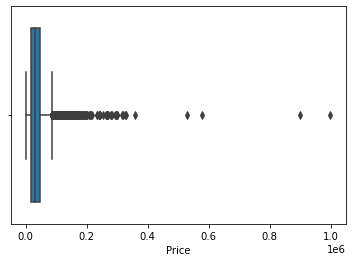

In [30]:
sns.boxplot(df['Price'])

In [31]:
# Finding extreme outliers in the Price column

sorted(df['Price'], reverse=True)[0:10]

[999000,
 899900,
 579900,
 529990,
 359850,
 329999,
 324900,
 319900,
 314988,
 299990]

In [32]:
df=df[~(df['Price']>300000) & (df['Price']<=999000)]

In [33]:
df.shape

(16965, 10)

#### Outliers in Year

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


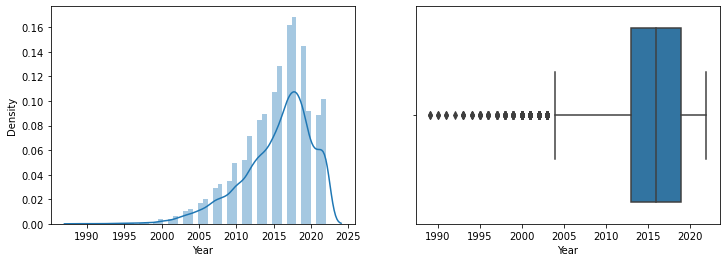

In [34]:
# Finding outliers in Year with the help of distplot and boxplot

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(df['Year'])

plt.subplot(122)
sns.boxplot(df['Year'])
plt.show()

In [35]:
df.shape

(16965, 10)

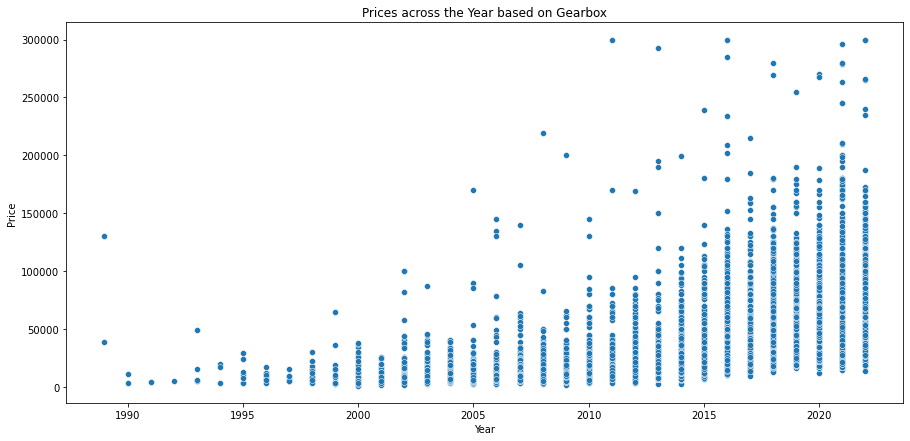

In [36]:
# Finding relation between the Year and Price cols.
plt.figure(figsize=(15,7))
sns.scatterplot(x=df['Year'], y=df['Price'])
plt.title('Prices across the Year based on Gearbox')
plt.show()

In [37]:
# finding the outliers in the dataset using the IQR method
# These are the Quartile ranges Q3 and Q1
percentile75 = df['Year'].quantile(0.75)
percentile25= df['Year'].quantile(0.25)
print('percentile75 is: ', percentile75)
print('percentile25 is: ', percentile25)

# IQR=Inter-Quartile Range
iqr=percentile75 - percentile25
print('IQR is: ', iqr)

# Finding the upper limit and lower limit.
upper_limit=percentile75 + 1.5*iqr
lower_limit=percentile25 - 1.5*iqr
print('upper_limit is: ', upper_limit)
print('lower_limit is: ', lower_limit)

percentile75 is:  2019.0
percentile25 is:  2013.0
IQR is:  6.0
upper_limit is:  2028.0
lower_limit is:  2004.0


In [38]:
df[df['Year']<lower_limit].shape

(345, 10)

In [39]:
# Capping the values of Year which are below the lower limit
df['Year']=np.where(df['Year']>upper_limit, upper_limit, np.where(df['Year']<lower_limit, lower_limit, df['Year']))

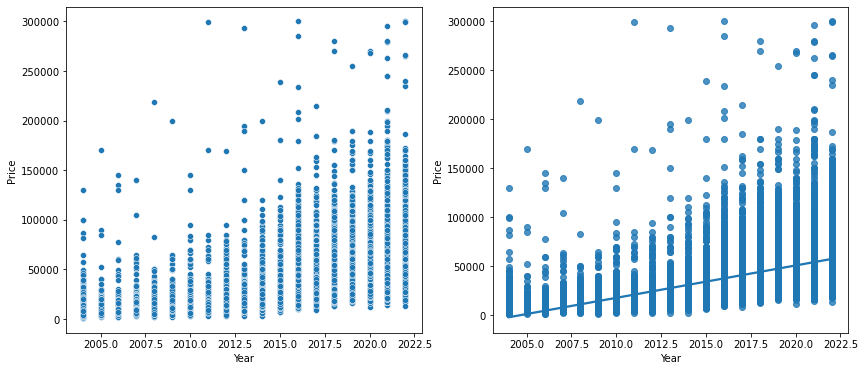

In [40]:
# After capping outliers 

plt.figure(figsize=(14,6))
plt.subplot(121)
sns.scatterplot(x=df['Year'], y=df['Price'])

plt.subplot(122)
sns.regplot(x=df['Year'], y=df['Price'])
plt.show()

#### Outliers in CC

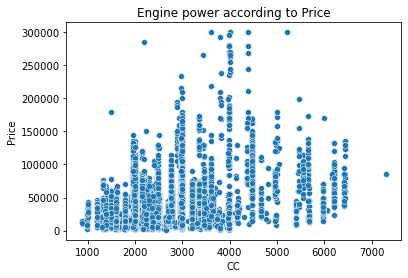

In [41]:
# Relation between CC and Price
sns.scatterplot(x=df['CC'], y=df['Price'])
plt.title('Engine power according to Price')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CC'>

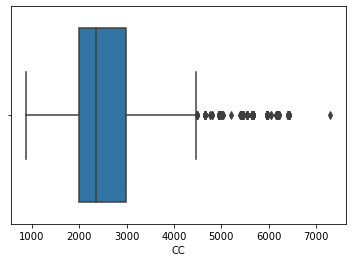

In [42]:
# Finding extreme outliers in CC
sns.boxplot(df['CC'])

In [43]:
sorted(df['CC'], reverse=True)[0:10]

[7300, 6424, 6424, 6424, 6424, 6424, 6424, 6424, 6424, 6424]

In [44]:
# Removing the outliers
df=df[~(df['CC']>7000) & (df['CC']<7500)]

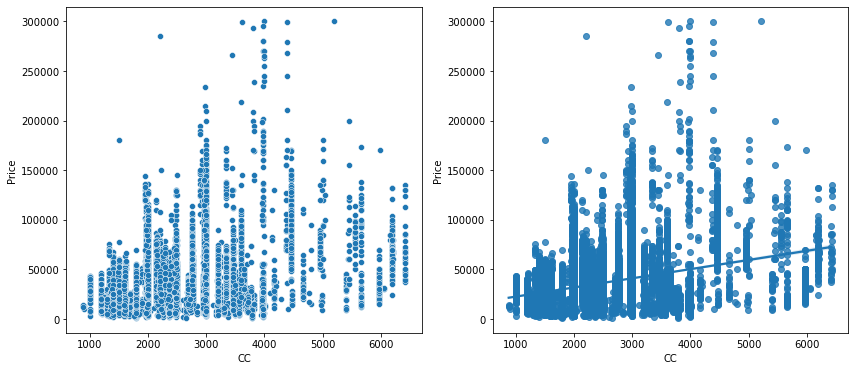

In [45]:
# finding the line of regression
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.scatterplot(x=df['CC'], y=df['Price'])

plt.subplot(122)
sns.regplot(x=df['CC'], y=df['Price'])
plt.show()

#### Outliers in Kilometers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


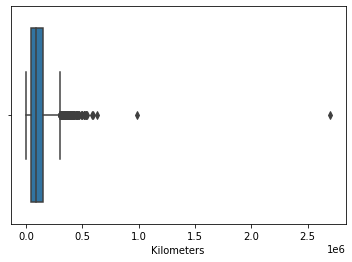

In [46]:
# Finding extreme outliers in Kilometers
sns.boxplot(df['Kilometers'])
plt.show()

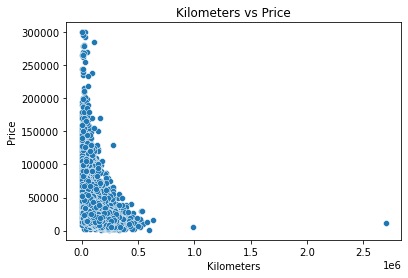

In [47]:
# Checking for extreme outliers

sns.scatterplot(x=df['Kilometers'], y=df['Price'])
plt.title('Kilometers vs Price')
plt.show()

In [48]:
sorted(df['Kilometers'], reverse=True)[0:5]

[2700000, 987475, 634470, 598000, 583000]

In [49]:
# removing the extreme outliers in the kilometer col
df=df[~(df['Kilometers']>=987475) & (df['Kilometers']<=2700000)]

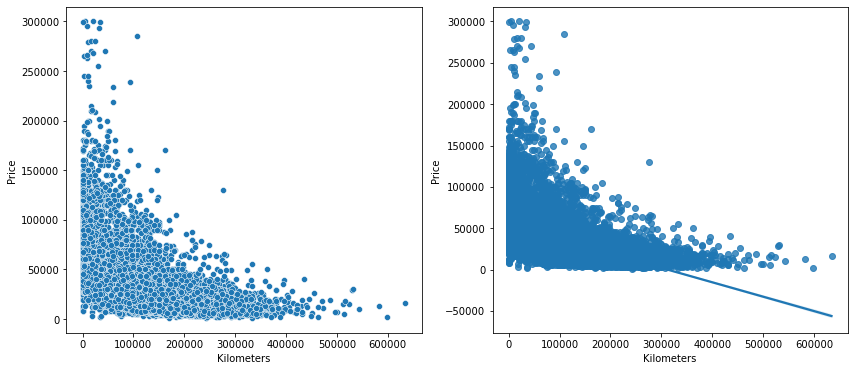

In [50]:
# finding the line of regression
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.scatterplot(x=df['Kilometers'], y=df['Price'])

plt.subplot(122)
sns.regplot(x=df['Kilometers'], y=df['Price'])
plt.show()

In [51]:
df.shape

(16962, 10)

In [52]:
# Resetting the index after the drop of columns
df=df.reset_index(drop=True)

In [53]:
df.describe()

,Price,Year,Kilometers,CC
count,16962.000000,16962.000000,16962.000000,16962.000000
mean,36306.916342,2015.544040,103220.017981,2487.712416
std,26672.471328,4.518797,77628.965039,874.412797
min,1000.000000,2004.000000,1.000000,875.000000
25%,18800.000000,2013.000000,44759.500000,1987.000000
50%,29990.000000,2016.000000,88686.000000,2354.000000
75%,45969.000000,2019.000000,149038.000000,2979.000000
max,299990.000000,2022.000000,634470.000000,6424.000000


In [54]:
df.describe(include='object')

,Brand,Type,Status,Fuels,Colour,Gear_box
count,16962,16962,16962,16962,16962,16962
unique,38,7,3,4,8,2
top,Toyota,Wagon,Used,Petrol,White,Automatic
freq,2767,7889,16218,10381,6277,14519


## Data Visualization

#### Distribution of Fuel types respective to there Gearbox

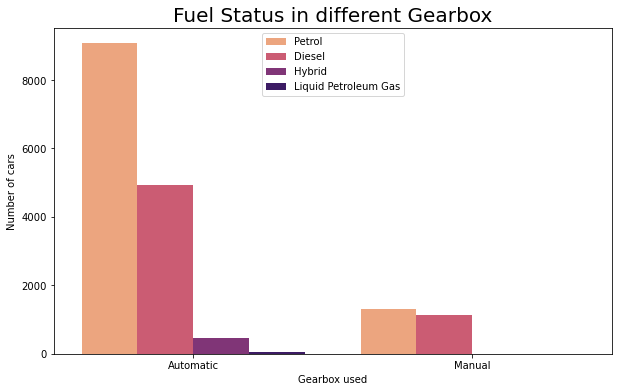

In [55]:
plt.figure(figsize=(10,6))
ax1=sns.countplot(x='Gear_box', hue='Fuels', data=df, palette='magma_r')
legend_labels,_= ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Fuel Status in different Gearbox', size=20)
plt.xlabel('Gearbox used')
plt.ylabel('Number of cars')
plt.legend(['Petrol', 'Diesel', 'Hybrid','Liquid Petroleum Gas'])
plt.show()

#### What is the percentage distribution of Type of cars ?

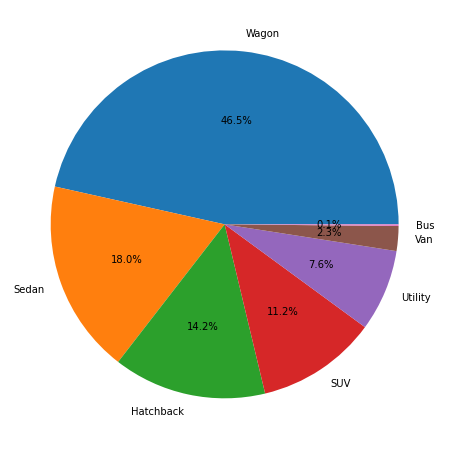

In [56]:
typ=df['Type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(typ, labels=typ.index, autopct='%0.1f%%')
plt.show()

#### Distribution of Gearbox respective to there Type

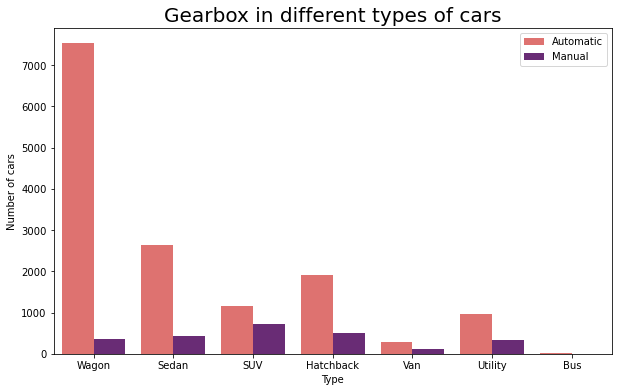

In [57]:
plt.figure(figsize=(10,6))
ax1=sns.countplot(x='Type', hue='Gear_box', data=df, palette='magma_r')
legend_labels,_= ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Gearbox in different types of cars', size=20)
plt.xlabel('Type')
plt.ylabel('Number of cars')
plt.legend(['Automatic', 'Manual'])
plt.show()

#### Which Brand has the dominance over the Second Hand Car market?

Toyota        2767
Holden        1504
Ford          1489
Mazda         1167
Hyundai       1087
Mitsubishi    1074
Volkswagen    1019
Nissan        1008
Kia            744
Subaru         655
Name: Brand, dtype: int64


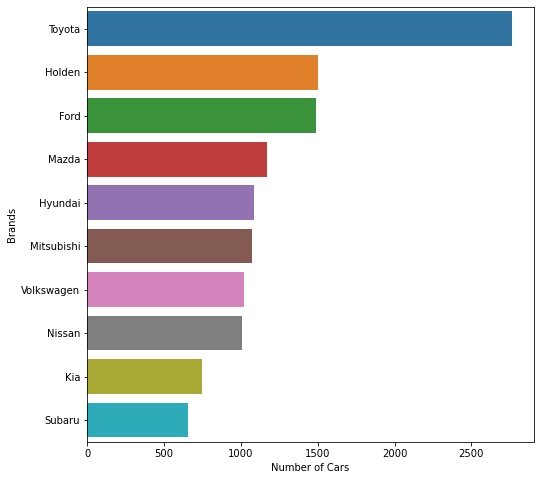

In [58]:
br=df['Brand'].value_counts()[0:10]
print(br)

plt.figure(figsize=(8,8))
sns.barplot(x=br, y=br.index)
plt.xlabel('Number of Cars')
plt.ylabel('Brands')
plt.show()

#### Plot a relation between Year and Price

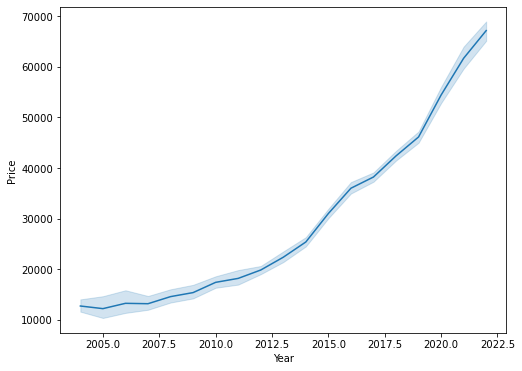

In [59]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df['Year'], y=df['Price'])
plt.show()

#### Relation between Price and Kilometers

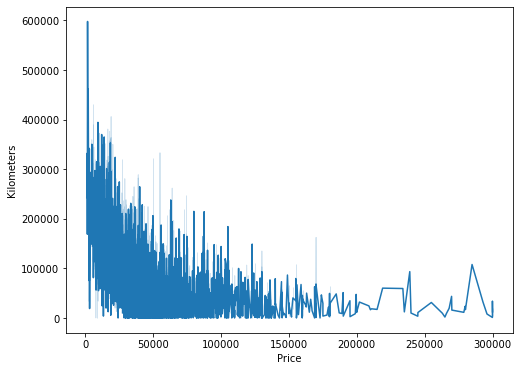

In [60]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df['Price'], y=df['Kilometers'])
plt.show()

#### Which Companies have the largest sum of price in the market?

Brand
Toyota          112707077
Ford             53690827
MercedesBenz     39351784
Volkswagen       38824678
Holden           35121084
Mazda            34894224
Mitsubishi       31063541
Hyundai          29610872
Audi             27249404
Nissan           27135276
Name: Price, dtype: int64


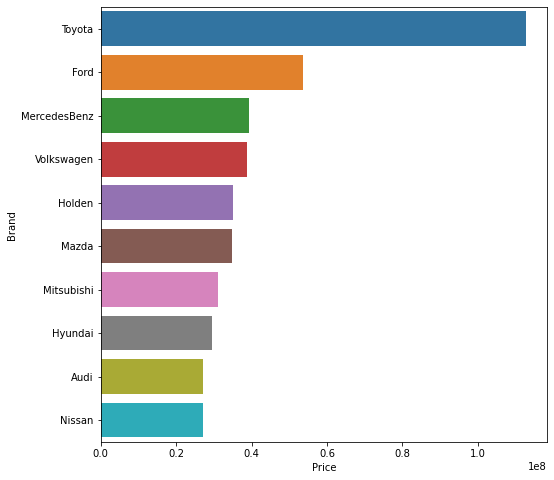

In [61]:
bp=df.groupby('Brand')['Price'].sum().nlargest(10)
print(bp)

plt.figure(figsize=(8,8))
sns.barplot(x=bp, y=bp.index)
plt.show()

#### Distribution of Fuel types

Petrol                  10381
Diesel                   6075
Hybrid                    466
Liquid Petroleum Gas       40
Name: Fuels, dtype: int64


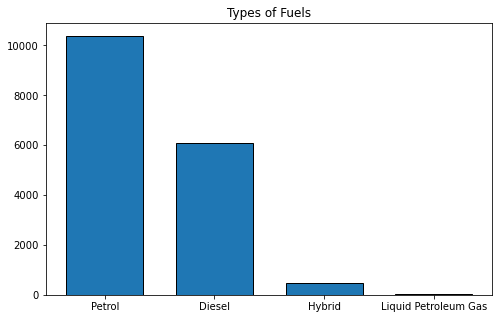

In [62]:
ff=df['Fuels'].value_counts()
print(ff)

plt.figure(figsize=(8,5))
plt.title('Types of Fuels')
plt.bar(ff.index, ff, edgecolor='k', width=0.7)
plt.show()

#### Status distribution

Used          16218
Demo            387
NewInStock      357
Name: Status, dtype: int64


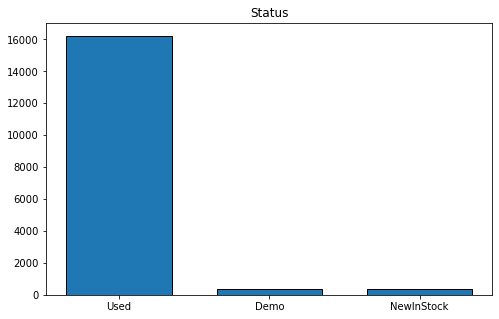

In [63]:
ff=df['Status'].value_counts()
print(ff)

plt.figure(figsize=(8,5))
plt.title('Status')
plt.bar(ff.index, ff, edgecolor='k', width=0.7)
plt.show()

#### Number of Toyota cars over the years

<BarContainer object of 19 artists>

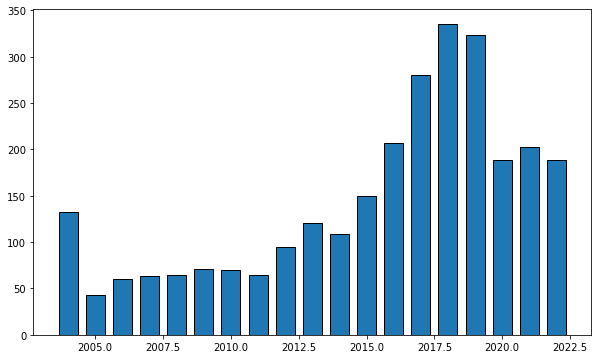

In [64]:
df_toyota=df[df['Brand']=='Toyota']
yt= df_toyota['Year'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(yt.index, yt, edgecolor='k', width=0.7)

array([[<AxesSubplot:xlabel='Kilometers', ylabel='Kilometers'>,
        <AxesSubplot:xlabel='Price', ylabel='Kilometers'>,
        <AxesSubplot:xlabel='Year', ylabel='Kilometers'>,
        <AxesSubplot:xlabel='CC', ylabel='Kilometers'>],
       [<AxesSubplot:xlabel='Kilometers', ylabel='Price'>,
        <AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Year', ylabel='Price'>,
        <AxesSubplot:xlabel='CC', ylabel='Price'>],
       [<AxesSubplot:xlabel='Kilometers', ylabel='Year'>,
        <AxesSubplot:xlabel='Price', ylabel='Year'>,
        <AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='CC', ylabel='Year'>],
       [<AxesSubplot:xlabel='Kilometers', ylabel='CC'>,
        <AxesSubplot:xlabel='Price', ylabel='CC'>,
        <AxesSubplot:xlabel='Year', ylabel='CC'>,
        <AxesSubplot:xlabel='CC', ylabel='CC'>]], dtype=object)

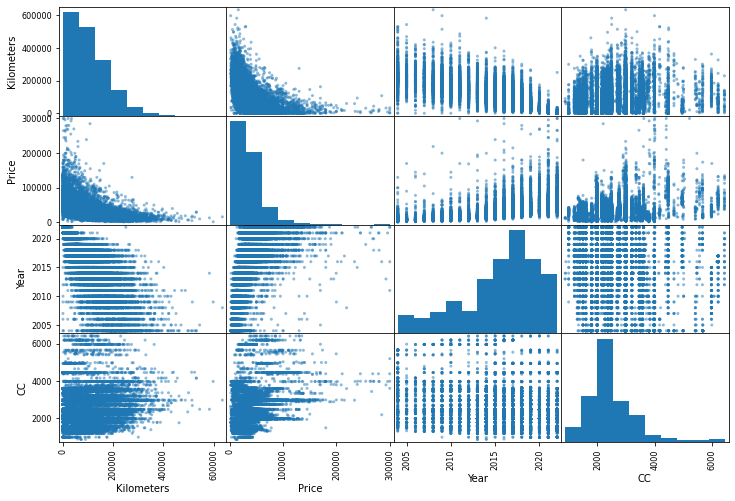

In [65]:
attributes=['Kilometers', 'Price', 'Year', 'CC']
scatter_matrix(df[attributes], figsize=(12,8))

In [66]:
df.describe(include='object')

,Brand,Type,Status,Fuels,Colour,Gear_box
count,16962,16962,16962,16962,16962,16962
unique,38,7,3,4,8,2
top,Toyota,Wagon,Used,Petrol,White,Automatic
freq,2767,7889,16218,10381,6277,14519


<AxesSubplot:>

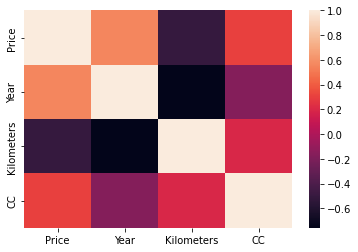

In [67]:
# Finding Correlation between various numeric columns

sns.heatmap(df.corr())

In [68]:
# Converting the cleaned dataset into a csv file
df.to_csv('cleaned car.csv')

In [69]:
# Dividing the dataset in X and y columns
# Taking the y in the form of log
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [70]:
X.head()

,Brand,Year,Kilometers,Type,Status,Fuels,CC,Colour,Gear_box
0,Toyota,2010.0,263000,Wagon,Used,Petrol,2362,Grey,Automatic
1,MercedesBenz,2021.0,19,Wagon,NewInStock,Diesel,2143,Black,Automatic
2,MercedesBenz,2021.0,24,Wagon,NewInStock,Diesel,2143,Black,Automatic
3,MercedesBenz,2010.0,120579,Sedan,Used,Diesel,2143,Black,Automatic
4,Holden,2016.0,72506,Wagon,Used,Petrol,1796,White,Automatic


In [71]:
y

0         9.210240
1        11.678355
2        11.289657
3        10.462818
4         9.679719
           ...    
16957     8.411610
16958     8.516993
16959     8.987072
16960     9.546813
16961     8.699348
Name: Price, Length: 16962, dtype: float64

### Multiple Linear Regression

In [74]:
#Assigning One Hot Encoding
ohe=OneHotEncoder()

In [75]:
ohe.fit(X[['Brand','Type','Status','Fuels','Colour','Gear_box']])

OneHotEncoder()

In [76]:
# Creating a column transformer
col_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Brand','Type','Status','Fuels','Colour','Gear_box']),
                                
                                 remainder='passthrough')

R2 score is:  0.8577710307394566
MAE is:  0.19272648876823656


In [77]:
# Creating a loop to see a which point we are getting the best results.
scores=[]
# Creating a for loop
for i in range (1000):
    # Creating a sample data from which we will train and test our data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(col_trans, lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [78]:
# Checking for the point where I got the best result
np.argmax(scores)

979

In [79]:
# Finding the result
scores[np.argmax(scores)]

0.8779524945395503

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(col_trans, lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score is: ', r2_score(y_test, y_pred))
print('MAE is: ', mean_absolute_error(y_test, y_pred))

R2 score is:  0.8779524945395503
MAE is:  0.18663229378495969
